# Time Series Exploratory Analysis Lesson

08 February 2023



In [1]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# San Antonio temperatures

url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col = 'datetime', parse_dates = True).sort_index()

# conversino from Kelvin to Fahrenheit
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range :', df.index.min(), 'to', df.index.max())
print('Shape :', df.shape)

df.sample(5)

Date Range : 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape : (45252, 1)


,temp
datetime,
2015-09-20 05:00:00,75.9740
2016-02-15 13:00:00,55.8140
2013-06-11 21:00:00,91.4360
2015-01-09 23:00:00,38.3468
2013-08-04 06:00:00,80.8700


## Splitting the data

    - Human-based : we, the programmer, decide. 
    - Percentage-based : based on pc of amount of data
    - Cross validation : a chunk of data can contain train & validation, with validation being different portion of this each time.  
    - Assure presence of 1 full cycle in each dataset.
    

In [3]:
# splitting based on pc, returning whole numbers (int)

train_length = int(0.6 * len(df))

val_test_split = int(0.8 * len(df))

train_length, val_test_split

(27151, 36201)

In [4]:
# pc-based splitting : bounds for each subset of data

train = df.iloc[:train_length]

val = df.iloc[train_length:val_test_split]

test = df.iloc[val_test_split:]

train.shape, val.shape, test.shape

((27151, 1), (9050, 1), (9051, 1))

In [5]:
# # human-based splitting

# train = df.loc[:'2016']
# test = df.loc['2017']

# train.shape, test.shape

In [25]:
# looking at train
train.sample(3)

,temp,month
datetime,,
2015-07-06 13:00:00,76.550,July
2014-01-31 21:00:00,76.784,January
2015-07-04 03:00:00,79.952,July


### Visualise the variable

Text(0.5, 1.0, 'distribution of target')

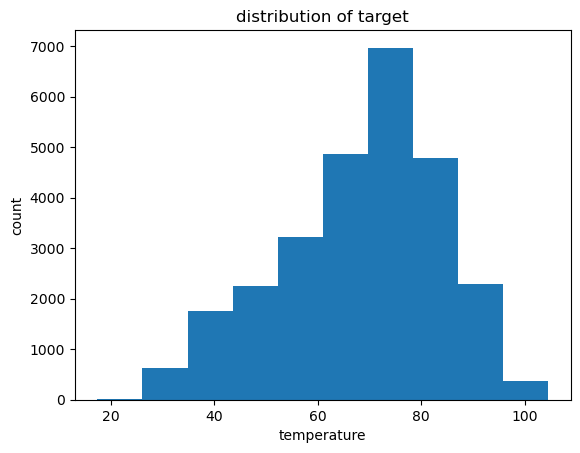

In [7]:
plt.hist(train)
plt.xlabel('temperature')
plt.ylabel('count')
plt.title('distribution of target')

In [8]:
# get month names

train.index.month_name().unique()

Index(['October', 'November', 'December', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September'],
      dtype='object', name='datetime')

In [9]:
# making month col
train['month'] = train.index.month_name()

In [10]:
train.head(1)

,temp,month
datetime,,
2012-10-01 13:00:00,61.052,October


In [11]:
# groupby avegerage monthly temperature

train.groupby('month')['temp'].mean().sort_values(ascending = False)

month
August       84.834026
July         82.824340
June         80.786451
September    79.397878
May          73.613415
October      71.759727
April        68.668510
March        60.121548
November     58.707594
February     54.658854
December     53.779050
January      49.632390
Name: temp, dtype: float64

<AxesSubplot:xlabel='month'>

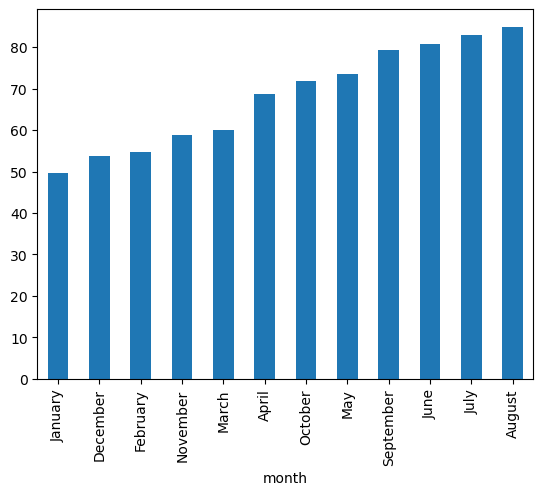

In [12]:
# bar plot of avg tem

train.groupby('month')['temp'].mean().sort_values().plot.bar()

## Visualise target over time

<AxesSubplot:xlabel='datetime'>

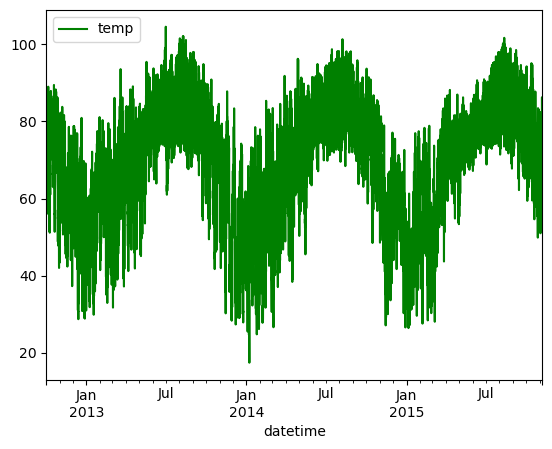

In [13]:
# plot train

train.plot(c = 'g')

<AxesSubplot:xlabel='datetime'>

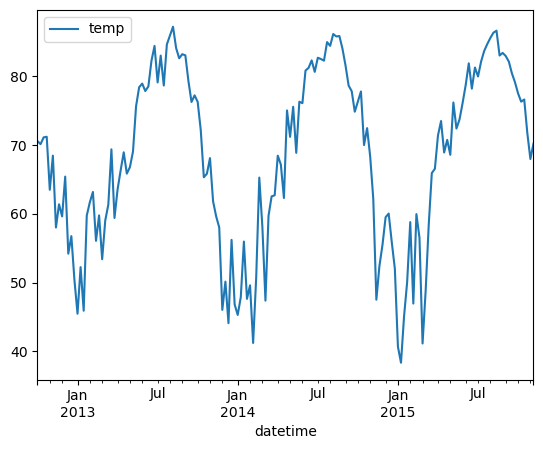

In [31]:
# resample to 'w' (must have an aggregate, ie, mean(), etc)

train.resample('w').mean().plot()

<AxesSubplot:xlabel='datetime'>

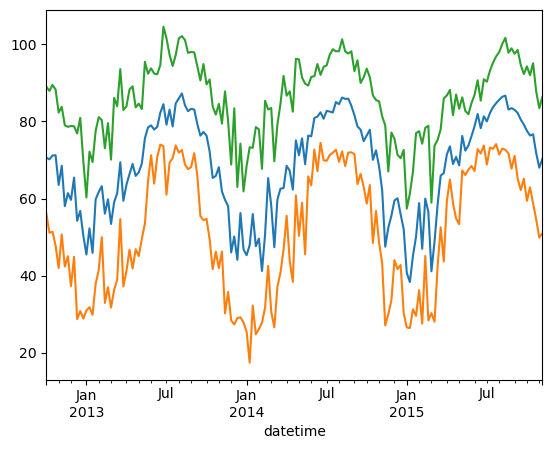

In [15]:
# plot a lot

train.resample('w').mean()['temp'].plot()
train.resample('w').min()['temp'].plot()
train.resample('w').max()['temp'].plot()


<AxesSubplot:xlabel='datetime'>

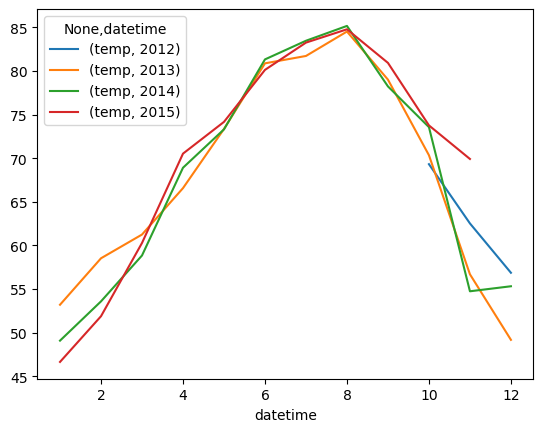

In [34]:
# plotting mean temp over each year

train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot()

# .unstack(0) unstacks at the 0th index

In [17]:
# .unstack(0) unstacks at the 0th index of the .groupby()

train.groupby([train.index.year, train.index.month]).mean().unstack(0)

temp                                 
datetime       2012       2013       2014       2015
datetime                                            
1               NaN  53.192333  49.072897  46.631940
2               NaN  58.522799  53.579080  51.874683
3               NaN  61.244479  58.842459  60.277705
4               NaN  66.569717  68.908933  70.526879
5               NaN  73.358529  73.311970  74.169747
6               NaN  80.885728  81.337658  80.135967
7               NaN  81.731819  83.476876  83.264325
8               NaN  84.534117  85.178102  84.789859
9               NaN  79.016805  78.238621  80.938208
10        69.318705  70.343832  73.567252  73.766466
11        62.521575  56.686028  54.735951  69.915052
12        56.860014  49.165310  55.311824        NaN

## Lag Plots

    relationship between b value and c-in-the-future-predicted value

In [18]:
# make a new dataframe

weekly_mean = train.resample('w').mean()

weekly_mean.head()

,temp
datetime,
2012-10-07,70.595201
2012-10-14,70.152821
2012-10-21,71.138375
2012-10-28,71.230464
2012-11-04,63.510554


In [19]:
# shifting the values by -1 : shifts the actual value up (behind) by -x number of rows
# allows to compare avg temp of this week to avg temp of the following (ie, 'shifted') week

weekly_mean['shifted'] = weekly_mean['temp'].shift(-1)

In [20]:
weekly_mean.head()

,temp,shifted
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625


Text(0, 0.5, 'temp next week')

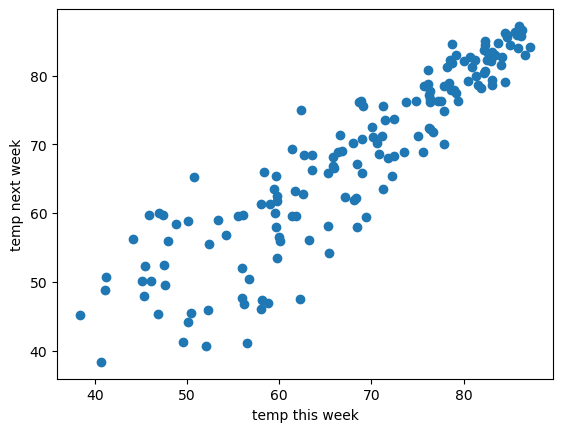

In [21]:
# plotting the shift

plt.scatter(weekly_mean['temp'], weekly_mean['shifted'])
plt.xlabel('temp this week')
plt.ylabel('temp next week')

In [22]:
# offsetting by half_year to the future from the 'today'

weekly_mean['half_year'] = weekly_mean['temp'].shift(-26)

Text(0, 0.5, 'temp in 26 weeks')

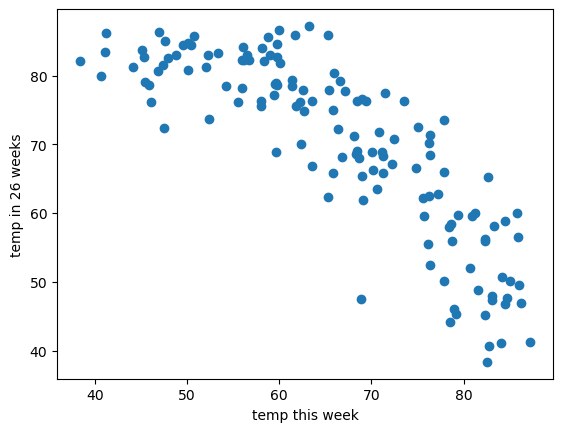

In [23]:
plt.scatter(weekly_mean['temp'], weekly_mean['half_year'])

plt.xlabel('temp this week')
plt.ylabel('temp in 26 weeks')

# DO OLDEST DATE TO NEWEST DATE

## Autocorrelation plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

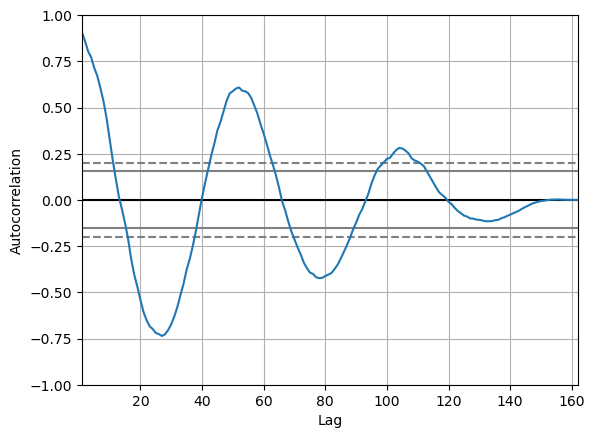

In [41]:
pd.plotting.autocorrelation_plot(train.resample('w').mean())

# shows how when df is lagged by a certian num of unit, how well correlated is it with the present 

# lag = how many weeks away we are looking
# high pos corr when looking at nearer-to-today dates (lag = > 60)
# corr of 0.2 or less is probably not worth credibilising
# strong neg corr when values misaligned by 26 weeks

## Seasonal decomposition
    Breaks apart from our data the overall trend in the seasonality that is present in our data.
    Observed, trend, seasonal, resid.
    Resid = residuals in the prediction
    

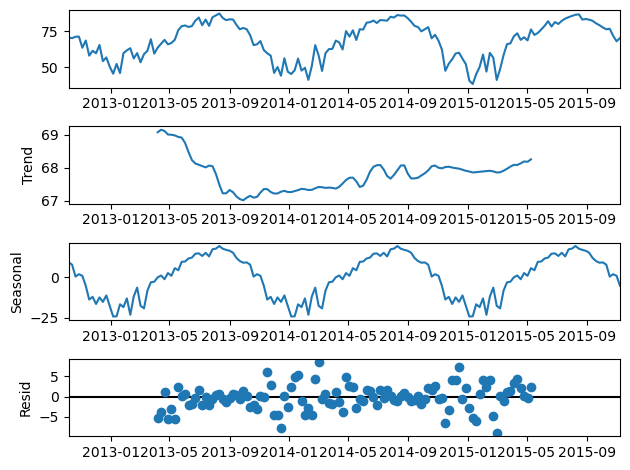

In [44]:
result = sm.tsa.seasonal_decompose(train.resample('w').mean())
result.plot()
None
# 'None' avoids it being printed twice